In [1]:
import matplotlib
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

In [64]:
CAFFEINE = "Cn1c(=O)c2c(ncn2C)n(C)c1=O"
FILENAME = "caffeine.png"

In [65]:
mol = Chem.MolFromSmiles(CAFFEINE)
Draw.MolToFile(mol, FILENAME)

In [87]:
MOL1 = "CC1=CN=C(C(=C1OC)C)CS(=O)C2=NC3=C(N2)C=C(C=C3)OC"
MOL2 = "O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(=O)C2CC2)CC1"
MOL3 = "CC(C)(C)NC[C@@H](O)c1cc(O)cc(O)c1"
MOL4 = "CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O)ccc2Cl)cc1"
MOL1_FILENAME = "mol1.png"
MOL2_FILENAME = "mol2.png"
MOL3_FILENAME = "mol3.png"
MOL4_FILENAME = "mol4.png"

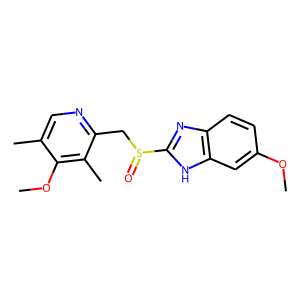

In [91]:
mol = Chem.MolFromSmiles(MOL1)
Draw.MolToImage(mol)

In [2]:
def unzip(elems):
    return tuple(zip(*elems))

In [3]:
uspto_50_span_aug = [
    (10, 47.2),
    (20, 50.2),
    (50, 51.6),
    (100, 52.6),
    (200, 52.1),
    (500, 53.6)
]

In [4]:
uspto_50_rand = [
    (10, 0.6),
    (20, 14.2),
    (50, 43.3),
    (100, 47.3),
    (200, 50.0),
    (500, 50.8)
]

In [5]:
uspto_50_sota = 48.3

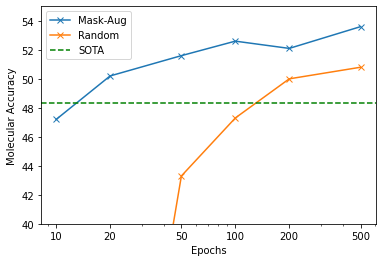

In [7]:
fig1, ax1 = plt.subplots()

ax1.plot(*unzip(uspto_50_span_aug), marker="x", label="Mask-Aug")
ax1.plot(*unzip(uspto_50_rand), marker="x", label="Random")
ax1.axhline(uspto_50_sota, color="green", linestyle="--", label="SOTA")

ax1.set_xscale("log")
ax1.set_xticks([10, 20, 50, 100, 200, 500])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.ylim(40, 55)
plt.xlabel("Epochs")
plt.ylabel("Molecular Accuracy")
plt.legend()

plt.show()

In [2]:
# ****************************
# *** Replicated Molecules ***
# ****************************

In [9]:
replicated_molecules = [
    (0.0, 11.9),
    (0.25, 37.1),
    (0.5, 42.1),
    (0.75, 44.9),
    (1.0, 69.3)
]

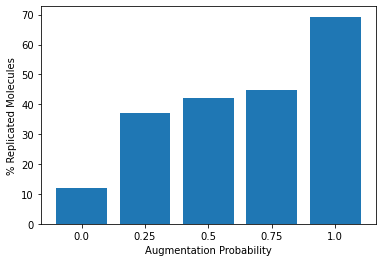

In [11]:
fig1, ax1 = plt.subplots()

ax1.bar(*unzip(replicated_molecules), width=0.2, tick_label=unzip(replicated_molecules)[0])

plt.xlabel("Augmentation Probability")
plt.ylabel("% Replicated Molecules")

# plt.show()
plt.savefig("replicated_mols_augmentation.png")

In [12]:
uspto_50_augmentation = [
    (0.0, 48.5, 70.9, 75.6),
    (0.25, 51.6, 67.6, 69.3),
    (0.5, 52.6, 65.8, 67.5),
    (0.75, 51.9, 63.8, 64.9),
    (1.0, 52.6, 54.7, 56.2)
]

In [13]:
aug_probs, top1, top5, top10 = unzip(uspto_50_augmentation)

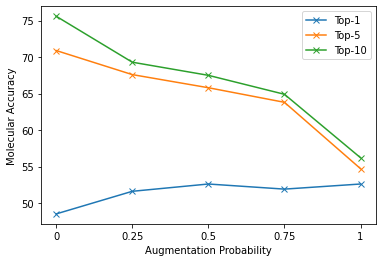

In [25]:
fig1, ax1 = plt.subplots()

ax1.plot(aug_probs, top1, marker="x", label="Top-1")
ax1.plot(aug_probs, top5, marker="x", label="Top-5")
ax1.plot(aug_probs, top10, marker="x", label="Top-10")

ax1.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax1.set_xticklabels(["0", "0.25", "0.5", "0.75", "1"])

plt.xlabel("Augmentation Probability")
plt.ylabel("Molecular Accuracy")
plt.legend()

plt.savefig("uspto_50_augmentation_ablation.png")
# plt.show()